# Import packages

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
plt.rcParams['figure.figsize'] = [16, 8]

# Data Preparation

## Load and show image

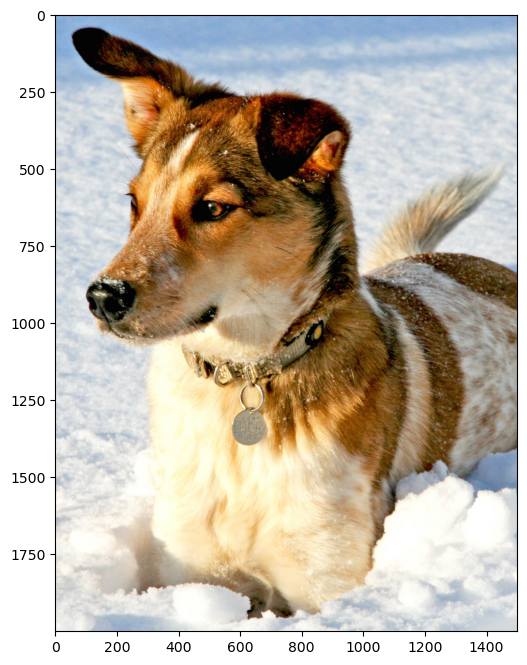

In [2]:
A = imread(os.path.join('DATA','dog.jpg'),)
plt.imshow(A)

## Process data into grayscale (from 3D to 2D)

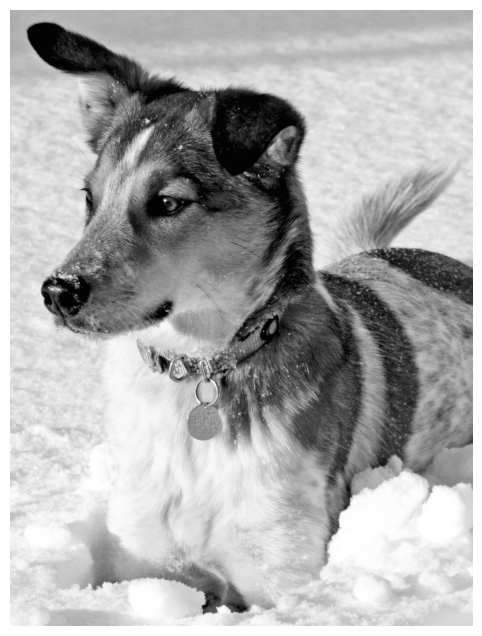

In [3]:
X = np.mean(A, 2) # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Implementation

In [4]:
# import module from svd
from svd import SVD

In [5]:
# matrix to test my implementation of SVD
matrix = np.array([[0,2],[2,3]])

In [6]:
svd = SVD(matrix=matrix, full_matrices=True)
svd._decompose()
svd.U, svd.singular_values, svd.V

/Users/emma/Library/CloudStorage/GoogleDrive-emmanuelka@aims.ac.za/My Drive/projects/MPhil-Projects/Computational mathematics project/svd.py:78: UserWarning: The rank of the matrix is not specified. The rank is set to the number of rows.
  warnings.warn('The rank of the matrix is not specified. The rank is set to the number of rows.')


(array([[ 0.4472136 , -0.89442719],
        [ 0.89442719,  0.4472136 ]]),
 array([4., 1.]),
 array([[ 0.4472136 ,  0.89442719],
        [ 0.89442719, -0.4472136 ]]))

In [7]:
matrix = np.array([[0,2],[2,3]])
U, S, V = np.linalg.svd(matrix)
U, S, V

(array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]),
 array([4., 1.]),
 array([[-0.4472136 , -0.89442719],
        [ 0.89442719, -0.4472136 ]]))

# Application to images (Principal component analysis)

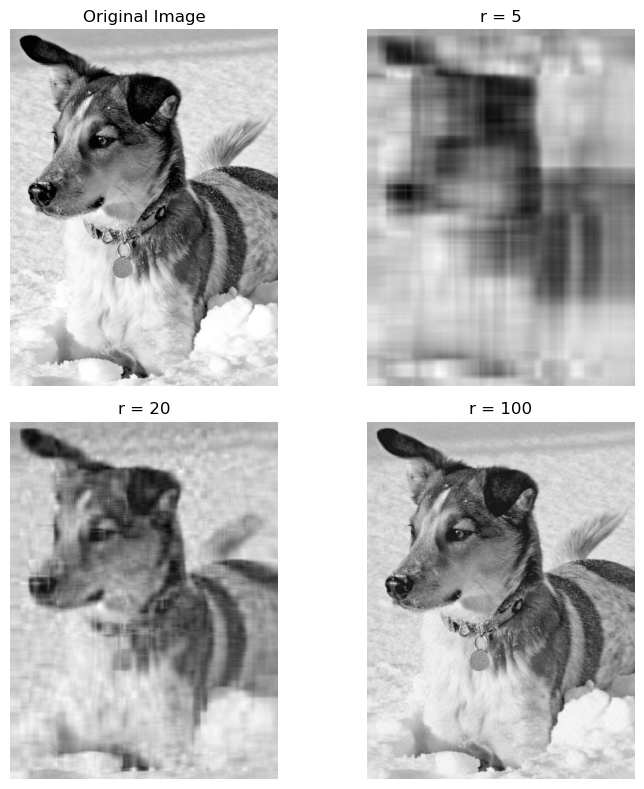

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(X, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

j = 1
for r in (5, 20, 100):
    svd = SVD(X, rank=r)
    svd._decompose()
    
    Xapprox = svd.U[:, :r] @ np.diag(svd.singular_values)[:r, :r] @ svd.V[:r, :]
    
    row = j // 2
    col = j % 2
    axs[row, col].imshow(Xapprox, cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title('r = ' + str(r))
    
    j += 1

plt.tight_layout()

fig.savefig('image_approx.jpg')
plt.show()
